<a href="https://colab.research.google.com/github/AydenRU/neural_networks-/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%963.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание №1. Использование глубокой сверточной нейронной сети для классификации предметов одежды на примере датасета Fashion MNIST


**В качестве интерфейса для работы с моделями используйте [Gradio](https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A#scrollTo=-uu_VR8H2K4h)**

[Техническая документация по датасету](https://www.kaggle.com/datasets/zalando-research/fashionmnist)

## 1.1. Устанавливаем необходимые зависимости

In [1]:
from keras.datasets import fashion_mnist # импорт исходного датасета
from tensorflow import keras
from keras.models import Sequential

from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.2. Разделяем данные на обучающую и тестовую выборку

In [4]:
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


## 1.3. Визуализируем часть данных из датасета

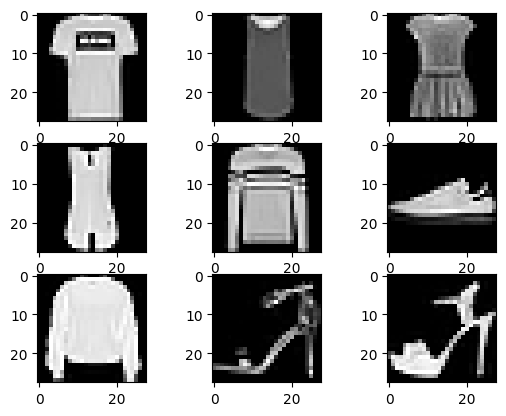

In [5]:
for i in range(1, 10):
    plt.subplot(3, 3, i)
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

## 1.4. Создаём архитектуру нейронной сети и компилируем модель

In [6]:
# Ваш код
x_train = trainX / 255
x_test = testX / 255
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

y_train = keras.utils.to_categorical(trainy, 10)
y_test = keras.utils.to_categorical(testy, 10)



print( x_train.shape )

(60000, 28, 28, 1)


In [7]:
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [8]:
model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10,  activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [10]:
EPOCH = 5

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
from keras.callbacks import ModelCheckpoint

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True)

## 1.5. Обучаем модель

In [13]:
# Ваш код
his = model.fit(x_train, y_train, batch_size=32, epochs=EPOCH, validation_split=0.2, callbacks=[checkpoint])

Epoch 1/5
   3/1500 [..............................] - ETA: 2:38 - loss: 2.2261 - accuracy: 0.2292

KeyboardInterrupt: 

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

## 1.6. Анализируем обученную модель. Строим график (графики) обучения

In [ ]:
# Ваш код
N = np.arange(0, EPOCH)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, his.history["loss"], label="train_loss")
plt.plot(N, his.history["val_loss"], label="val_loss")
plt.plot(N, his.history["accuracy"], label="train_accuracy")
plt.plot(N, his.history["val_accuracy"], label="val_accuracy")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
model.save("best_model_work_3.h5", save_format="h5")

## 1.7. Загружаем свои изображения. С помощью функции predict() получаем предсказание нейронной сети



> Требуется получить предсказания минимум по 5 изображениям, каждое из которых относится к разному классу. Не забудьте добавить метки к каждому классу (для этого можно просто создать список строк, каждая из которых будет соответствовать классу с определенным индексом см. [тех.док.](https://www.kaggle.com/datasets/zalando-research/fashionmnist)). Процент уверенности нейронной сети в своём предсказании выводить обязательно.



In [ ]:
!pip install gradio

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
def predict_image(img, model_path = "/content/best_model_work_3.h5"):

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras

    # Делаем предсказание на изображении
    img = cv2.resize(img, (28, 28)) # Изменение разрешения изображения
    cv2_imshow(img)
    img = np.invert(img)
    cv2_imshow(img)
    img = img / 255.0
    img = img.reshape(-1, 28, 28, 1) # Приводим изображение из вида (28,28) в вид (1, 28, 28, 1)
    preds = model.predict(img)
    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {class_names[i]: preds[0][i] for i in range(10)}

    return confidences

In [ ]:
import gradio as gr

In [ ]:
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение", image_mode="L"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(class_names)), # Выходные данные: топ-N классов с наибольшей вероятностью
)

In [ ]:
interface.launch(share=True, debug=True)

# Задание №2. Использование глубокой сверточной нейронной сети для классификации изображений по своему датасету


## 2.1.  Используя датасет, собранный для предыдущей работы, разработайте и обучите **свою** модель глубокой  **сверточной** нейронной сети для классификации изображений







In [3]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam
from keras.datasets import fashion_mnist

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.optimizers import Adam, SGD
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow# Ваш код


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
base_directory = '/content/drive/MyDrive/Задание_2/dataset/train'

# Инициализация четырех списков для хранения путей к изображениям в каждой поддиректории
imagePaths = []

# Проход по всем файлам и поддиректориям в базовой директории
for root, dirs, files in os.walk(base_directory):
    for file in files:
        # Проверка, что файл - изображение формата .jpeg
        if file.lower().endswith('.jpeg'):
            # Формирование полного пути к изображению
            image_path = os.path.join(root, file)

            if 'cavallo' in root:
                imagePaths.append(image_path)
            elif 'elefante' in root:
                imagePaths.append(image_path)
            elif 'ragno' in root:
                imagePaths.append(image_path)

len(imagePaths)

3595

In [6]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


In [7]:
# цикл по изображениям
for imagePath in imagePaths:

	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32))# меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
    # а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
	data.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [8]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255
labels = np.array(labels)
data.shape, labels.shape

((3595, 32, 32, 3), (3595,))

In [9]:
import pandas as pd

(trainX, testX, trainY, testY) = train_test_split(data,
	labels, test_size=0.25, random_state=42)

In [10]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)


In [11]:
trainX.shape, testX.shape, trainY.shape, testY.shape

((2696, 32, 32, 3), (899, 32, 32, 3), (2696, 3), (899, 3))

## 2.2.   Ознакомьтесь с современными архитектурами сверточных нейронных сетей: [см. ссылку](https://medium.com/aiguys/how-cnn-architectures-evolved-c53d3819fef8). На основе рассмотренных архитектур, реализуйте (частично повторяя основные паттерны проектирования) и обучите модель сверточной нейронной сети. Укажите архитектуру, которой Вы "вдохновились"

In [12]:
compression_size = 32
input_shape = (compression_size, compression_size, 3)

model = Sequential([
    Conv2D(64, (3,3), padding='same', activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(1024, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3,  activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       147712    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 256)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 1024)        2360320   
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 1024)        0

In [13]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=15) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model_3(work_2).h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

In [14]:
INIT_LR = 0.00001
EPOCHS = 40
opt = Adam(learning_rate=INIT_LR)

model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [15]:
history = model.fit(trainX,trainY,
                    batch_size=32,epochs=EPOCHS,
                    validation_data=(testX, testY),
                    callbacks=[early_stopping, checkpoint])

model.evaluate(testX, testY)

Epoch 1/40
85/85 [==============================] - 96s 1s/step - loss: 1.0846 - accuracy: 0.4158 - val_loss: 1.0626 - val_accuracy: 0.5172
Epoch 2/40


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


85/85 [==============================] - 94s 1s/step - loss: 1.0422 - accuracy: 0.5297 - val_loss: 1.0170 - val_accuracy: 0.5439
Epoch 3/40
85/85 [==============================] - 94s 1s/step - loss: 0.9819 - accuracy: 0.5720 - val_loss: 0.9408 - val_accuracy: 0.6073
Epoch 4/40
85/85 [==============================] - 96s 1s/step - loss: 0.9147 - accuracy: 0.5998 - val_loss: 0.8835 - val_accuracy: 0.5984
Epoch 5/40
85/85 [==============================] - 93s 1s/step - loss: 0.8620 - accuracy: 0.6116 - val_loss: 0.8436 - val_accuracy: 0.6174
Epoch 6/40
85/85 [==============================] - 95s 1s/step - loss: 0.8175 - accuracy: 0.6491 - val_loss: 0.7927 - val_accuracy: 0.6574
Epoch 7/40
85/85 [==============================] - 95s 1s/step - loss: 0.7785 - accuracy: 0.6625 - val_loss: 0.7618 - val_accuracy: 0.6674
Epoch 8/40
85/85 [==============================] - 92s 1s/step - loss: 0.7497 - accuracy: 0.6799 - val_loss: 0.7416 - val_accuracy: 0.6830
Epoch 9/40
85/85 [=============

[0.5267174243927002, 0.7775306105613708]

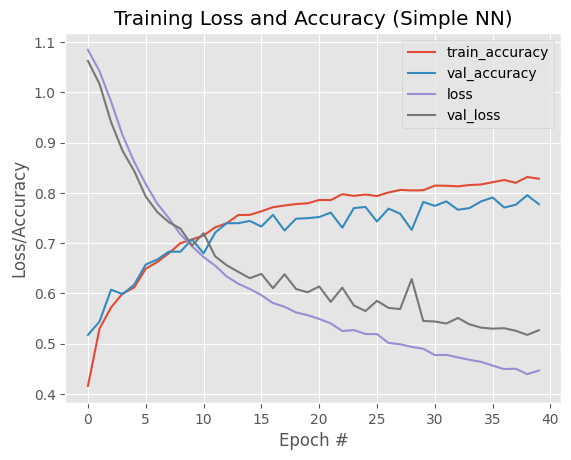

In [17]:
N = np.arange(0, 40)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["accuracy"], label="train_accuracy")
plt.plot(N, history.history["val_accuracy"], label="val_accuracy")
plt.plot(N, history.history["loss"], label="loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [53]:
from keras.models import load_model

model = load_model("/content/drive/MyDrive/Задание_3/model_work_3(w2).h5")

29/29 [==============================] - 9s 309ms/step


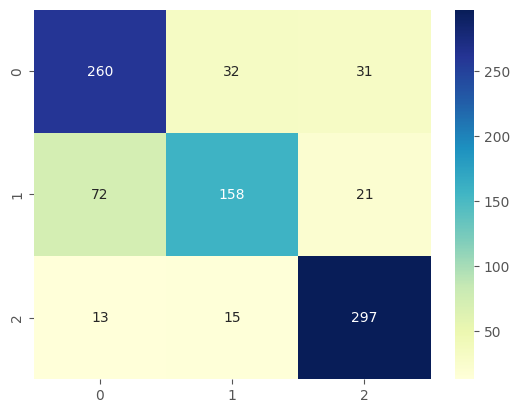

In [57]:
predY = model.predict(testX, batch_size=32)

# Преобразуем вероятности в метки классов
predY = predY.argmax(axis=1)
testY = test_y.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(testY, predY)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

## 2.3. Сохраните полученные модели

In [40]:
def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):

    model.save(model_path, save_format="h5")

    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [41]:
model_path = "model_work_3(w2).h5"
labels_path = "label_bin_work_3(2)"

In [42]:
save_model_and_labels(model, lb, model_path, labels_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## 2.4. Загрузите обученную модель из прошлой практической работы


In [56]:
data_old = []
labels_old = []

for imagePath in imagePaths:

	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (32, 32)).flatten()# меняем его разрешение на 32x32 пикселей (без учета соотношения сторон),
    # а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
	data_old.append(image) # добавляем в список

	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels_old.append(label) # обновляем список меток

data_old = np.array(data_old, dtype="float") / 255.0
labels_old = np.array(labels_old)
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(train_x, test_x, train_y, test_y) = train_test_split(data_old,
	labels_old, test_size=0.25, random_state=42)

# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
train_y = lb.fit_transform(train_y)
test_y = lb.transform(test_y)

# predictions_old = model_old.predict(test_x, batch_size=32)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((2696, 3072), (899, 3072), (2696, 3), (899, 3))

In [44]:
model_old = load_model("/content/drive/MyDrive/Задание_2/model.h5")

In [49]:
predY_old = model_old.predict(test_x, batch_size=32)

29/29 [==============================] - 0s 15ms/step


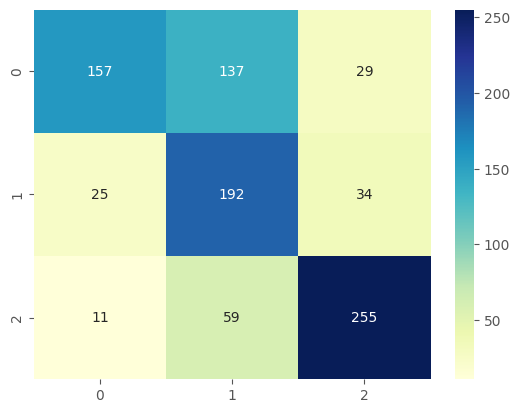

In [50]:
# Преобразуем вероятности в метки классов
predY_old = predY_old.argmax(axis=1)
test_y = test_y.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(test_y, predY_old)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()


## 2.5. Сравните между собой точной всех трёх моделей, подавая на вход одинаковые изображения (15 разных изображений). Сравните предсказания каждой из моделей и сделайте выводы

In [72]:
!pip install gradio

# Задание №3*. Использование глубокой сверточной нейронной сети для восстановления изображения

## 3.1. Работа с данными

Будем работать с набором данным `fetch_olivetti_faces` из `sklearn`.

### 3.1.1. Переведите векторы в настоящие изображения из двух размерностей

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

data, _ = fetch_olivetti_faces(return_X_y=True)
train, test = train_test_split(data, test_size=0.2, random_state=4)

In [ ]:
train.shape

Сейчас изображение - это вектор, имеющий размерность 4096.

In [ ]:
# Ваш код здесь

train = train.reshape((train.shape[0], 64, 64, 1))
test = test.reshape((test.shape[0], 64, 64, 1))

test.shape

### 3.1.2. Отрисуйте несколько примеров

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 5, figsize=(15, 10))

for i in range(5):
    ax[i].imshow(train[i], cmap='gray')
    ax[i].axis('off')

Поделим данные на X и y, где X - это верхняя часть лица человека, на этом модель будет обучаться, а y - это нижняя часть лица человека - её будем предсказывать.

In [ ]:
n_pixels = train.shape[1]

# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2, :]
# Lower half of the faces
y_train = train[:, n_pixels // 2:, :]


X_test = test[:, :(n_pixels + 1) // 2, :]
y_test = test[:, n_pixels // 2:, :]

In [ ]:
X_train.shape

Вот один пример обучающей пары.

In [ ]:
import matplotlib.pyplot as plt

idx = 0

fig, ax = plt.subplots(1, 2, figsize=(15, 8))
ax[0].imshow(X_train[idx], cmap='gray')
ax[0].set_title('X')
ax[1].imshow(y_train[idx], cmap='gray')
ax[1].set_title('y')
ax[0].axis('off')
ax[1].axis('off')

plt.show()

### 3.1.3. Измените размерность y
Остается только изменить размерность y, т.к. сейчас $y$ - картинка 32x64, а выход нейронной сети у нас будет одномерный и равный 32 * 64 = 2048.

In [ ]:
y_train_n = y_train.reshape(y_train.shape[0], 32 * 64)
y_test_n = y_test.reshape(y_test.shape[0], 32 * 64)

y_train_n.shape

## 3.2. Создайте архитектуру для этой задачи

In [ ]:
# Ваш код здесь
model = Sequential([
    Conv2D(512,(6,6),activation = 'relu', padding='Same', input_shape = (32, 64, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256,(6,6),activation = 'relu', padding='Same'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128,(6,6), activation = 'relu', padding='Same'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64,(6,6), activation = 'relu', padding='Same'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(32,(6,6), activation = 'relu', padding='Same'),
    Flatten(),
    Dense(4096,activation = 'relu'),
    Dense(3192,activation = 'relu'),
    Dense(2048,activation = 'linear')
])

model.summary()

## 3.3. Скомпилируйте сеть

Подберите нужную функцию потерь и метрику. Оптимизатор можете использовать 'adam'

In [ ]:
# Ваш код здесь
from keras.optimizers import Adam

In [ ]:
opt = Adam(learning_rate=0.0001, use_ema=True)
model.compile(optimizer=opt,
             loss='mean_squared_error',
             metrics=['mae'])

## 3.4. Обучите нейросеть

Выберите нужное количество эпох.


In [ ]:
# Ваш код здесь
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint(filepath="best_model_work_3(2).h5",
                             monitor="val_mae",
                             save_best_only=True,
                             verbose=0)
early_stopping = EarlyStopping(patience=5)

In [ ]:
# Ваш код здесь
EPOCH = 20

his = model.fit(X_train, y_train_n, batch_size=10, epochs=EPOCH, validation_split=0.2, callbacks=[checkpoint, early_stopping])

model.evaluate(X_test, y_test_n)

## 3.5. Сделайте предсказания на тестовых данных

In [ ]:
from keras.models import load_model

model = load_model("/content/best_model_work_3(2).h5")

In [ ]:
preds = model.predict(X_test)

## 3.6. Посчитайте метрику качества на тестовых данных

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test_n)

## 3.7. Преобразуйте предсказанные векторы в двумерное изображение (поменяйте их размерность)

In [ ]:
# Ваш код здесь
pred_test = preds.reshape(-1, 32, 64, 1)

Отрисуйте все предсказания.

In [ ]:
# Пример кода:

n_faces = 10
n_cols = 2
image_shape = (64, 64)
plt.figure(figsize=(3 * n_cols, 3 * n_faces))


for i in range(10):
    true_face = np.vstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1, title="true faces")

    sub.axis("off")
    sub.imshow(
        true_face.reshape(image_shape), cmap=plt.cm.gray, interpolation="nearest"
    )

    completed_face = np.vstack((X_test[i], pred_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 2)

    sub.axis("off")
    sub.imshow(
        completed_face.reshape(image_shape),
        cmap=plt.cm.gray,
        interpolation="nearest",
    )